<a href="https://colab.research.google.com/github/solvedbrunus/AB-Image-Classification/blob/main/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.backend import clear_session
clear_session()

Data Preprocessing



In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
impor

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [ ]:

# separating training and validation set
X_valid = X_train[:10000]
X_train = X_train[10000:]

y_valid = y_train[:10000]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


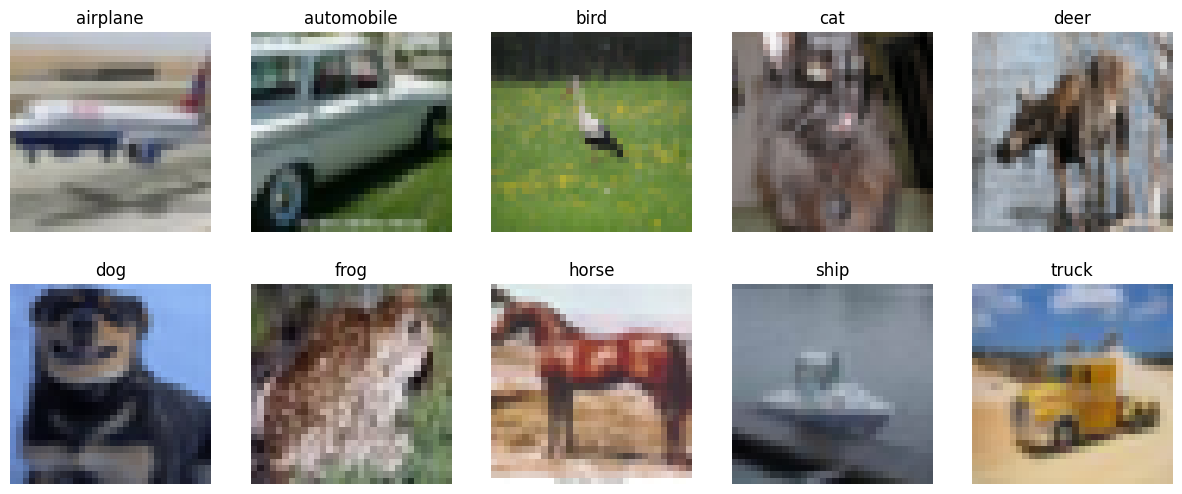

In [ ]:

#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Define the class names

# Create a 10x10 grid of plots to display the images and their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()

# Set random seed for reproducibility
np.random.seed(42)

# Loop through each class and select 10 random samples
for class_index in range(10):
    class_samples = np.where(y_train == class_index)[0]
    random_sample = np.random.choice(class_samples, 1, replace=False)
    sample_index = random_sample[0]
    ax = axes[class_index]
    ax.imshow(X_train[sample_index])
    ax.set_title(class_names[class_index])
    ax.axis('off')


plt.show()


Data Normalization and Agumentation


In [ ]:
#normalize the data by dividing by 255 to scale the pixel values between 0 and 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255

print('shape of x train normalized', X_train.shape)
print('shape of x test normalized', X_test.shape)
print('shape of x train validation', X_valid.shape)


shape of x train normalized (40000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [1]
After conversion to categorical one-hot encoded labels:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,          # Random rotation by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10%
    height_shift_range=0.1,     # Randomly shift images vertically by 10%
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1              # Random zoom by 10%
)

# Fit the data generator to the training data - applying outside of the model
datagen.fit(X_train)

Model Architecture

In [ ]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model - ankita fixes
model = Sequential([

        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),


        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # L2 regularization
        layers.Dense(10, activation='softmax')
    ])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341,226 (5.12 MB)

 Trainable params: 1,341,226 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer= 'adam',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 50
    BATCH_SIZE:    int = 256

In [ ]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.2501 - loss: 1.9966 - val_accuracy: 0.4493 - val_loss: 1.4901
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5045 - loss: 1.3682 - val_accuracy: 0.5699 - val_loss: 1.1994
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6142 - loss: 1.0932 - val_accuracy: 0.6343 - val_loss: 1.0396
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6731 - loss: 0.9361 - val_accuracy: 0.6836 - val_loss: 0.8908
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7214 - loss: 0.7933 - val_accuracy: 0.7110 - val_loss: 0.8206
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7541 - loss: 0.6951 - val_accuracy: 0.7284 - val_loss: 0.7684
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7867 - loss: 0.6185 - val_accuracy: 0.7386 - val_loss: 0.7546
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8149 - loss: 0.5396 - val_accuracy: 0

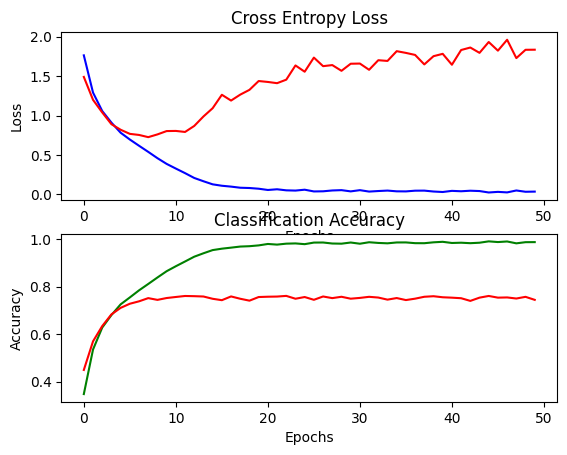

In [ ]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


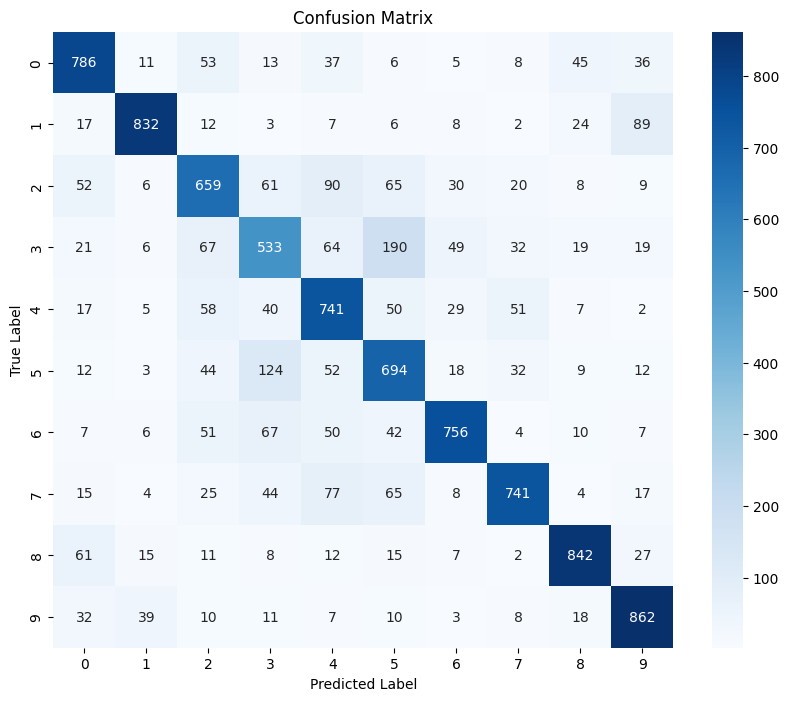

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Text loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7420 - loss: 1.9541
Text loss:  1.9833425283432007
Test accuracy:  0.7445999979972839


In [ ]:
# adding Dropout to the model
from tensorflow.keras import layers

# define model - fix this ankita
def cnn_model_dropout():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
# create the model
model_dropout = cnn_model_dropout()
model_dropout.summary()

# compile dropout mode
model_dropout.compile(
    optimizer='adam',#'sgd',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train dropout model
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.2309 - loss: 2.0357 - val_accuracy: 0.4312 - val_loss: 1.5225
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4433 - loss: 1.5093 - val_accuracy: 0.5575 - val_loss: 1.2123
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5421 - loss: 1.2708 - val_accuracy: 0.6293 - val_loss: 1.0488
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5921 - loss: 1.1294 - val_accuracy: 0.6443 - val_loss: 0.9940
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6379 - loss: 1.0209 - val_accuracy: 0.6913 - val_loss: 0.8766
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6697 - loss: 0.9334 - val_accuracy: 0.6879 - val_loss: 0.8718
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6855 - loss: 0.8912 - val_accuracy: 0.7256 - val_loss: 0.7760
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7005 - loss: 0.8480 - val_accuracy: 

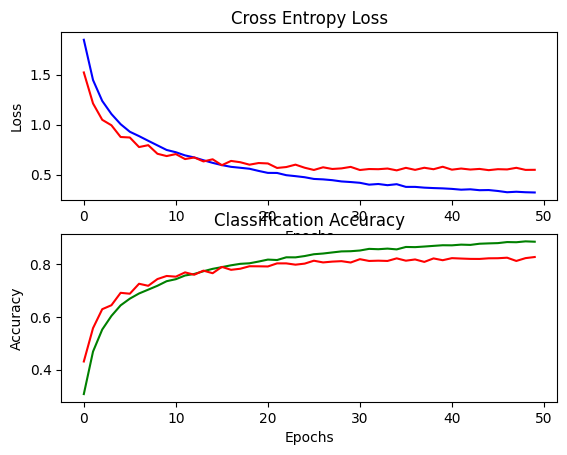

In [ ]:
# TODO - optimise
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_dropout.history['loss'], color='blue', label='train')
plt.plot(history_dropout.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_dropout.history['accuracy'], color='green', label='train')
plt.plot(history_dropout.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


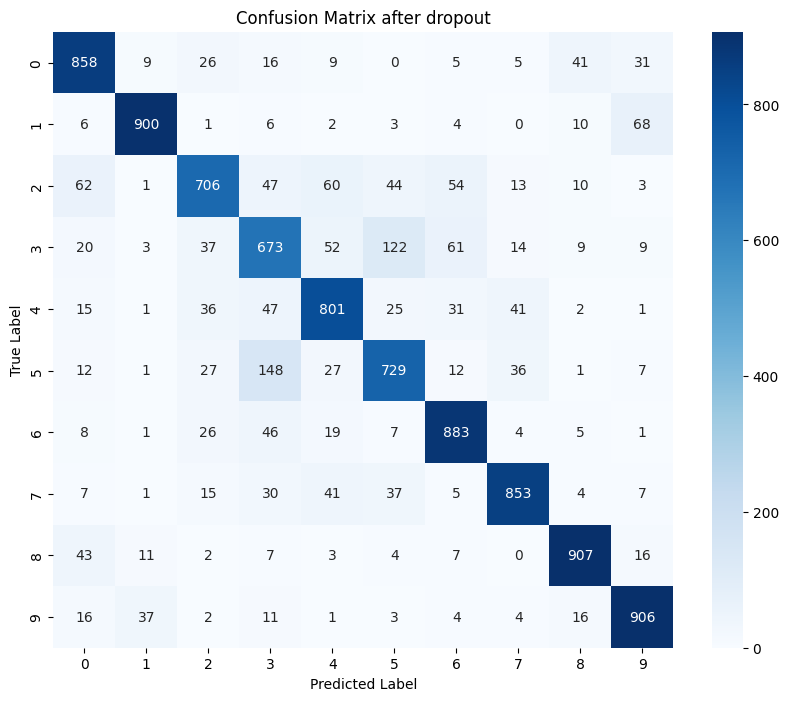

In [ ]:
# TODO optimise
y_pred_dropout = model_dropout.predict(X_test)

predictions = np.argmax(y_pred_dropout, axis=1)
gt_dropout = np.argmax(y_test, axis=1)
cm_dropout = confusion_matrix(gt_dropout, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dropout, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix after dropout')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.5824
Test loss:  0.5837992429733276
Test accuracy:  0.8216000199317932


Model Checkpoint

In [1]:
#model checkpoint

from tf.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor ="val_loss",mode="min", save_best_only=True, verbose=1)

#add model checkpoint as callback in model fit
history = model.fit(X_train, y_train, batch_size=TrainingConfig.BATCH_SIZE, epochs=TrainingConfig.EPOCHS, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

ModuleNotFoundError: No module named 'tf'

Transfer Learning - test - keep testing

In [ ]:
# transfer learning using VGG16 Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the VGG16 model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Freeze the layers in the VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Add a new fully connected layer to the VGG16 model
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)



In [ ]:
# Create a new model using the VGG16 model and the new fully connected layer
model_vgg = Model(inputs=vgg.input, outputs=x)

model_vgg.summary()

# compile the model
model_vgg.compile(
    optimizer='adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model


history_vgg = model_vgg.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_vgg.history['loss'], color='blue', label='train')
plt.plot(history_vgg.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_vgg.history['accuracy'], color='green', label='train')
plt.plot(history_vgg.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# TODO optimise
y_pred_vgg = model_vgg.predict(X_test)

predictions = np.argmax(y_pred_vgg, axis=1)
gt_vgg = np.argmax(y_test, axis=1)
cm_vgg = confusion_matrix(gt_vgg, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_vgg, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix after VGG16')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

test_loss, test_accuracy = model_vgg.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)
